<a href="https://colab.research.google.com/github/Omar-ABDELKEFI/AutoPilot/blob/main/steemit_curator_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📋 CSV Columns: ['Curator', 'Author', 'Title', 'Created', 'URL', 'Content Type', 'Tags', 'Community', 'Country', 'Word Count', 'Image Count', 'Vote Weight', 'Payout Value', 'Block Number', 'Transaction Index', 'Timestamp', 'Parent Author', 'Root Author', 'Reading Time', 'Link Count', 'Reputation', 'Category', 'Payout Status']

📊 Data Preview:
  Curator            Author                      Title  \
0   kafio  franyeligonzalez  Post by @franyeligonzalez   
1   kafio           josepha           Post by @josepha   
2   kafio         baizid123         Post by @baizid123   
3   kafio            elinav            Post by @elinav   
4   kafio         rubina203         Post by @rubina203   

                    Created  \
0  2025-08-15T09:51:15.000Z   
1  2025-08-15T09:53:36.000Z   
2  2025-08-15T09:54:18.000Z   
3  2025-08-15T09:54:27.000Z   
4  2025-08-15T13:41:36.000Z   

                                                 URL Content Type  \
0  https://steemit.com/@franyeligonzalez/que-opin..

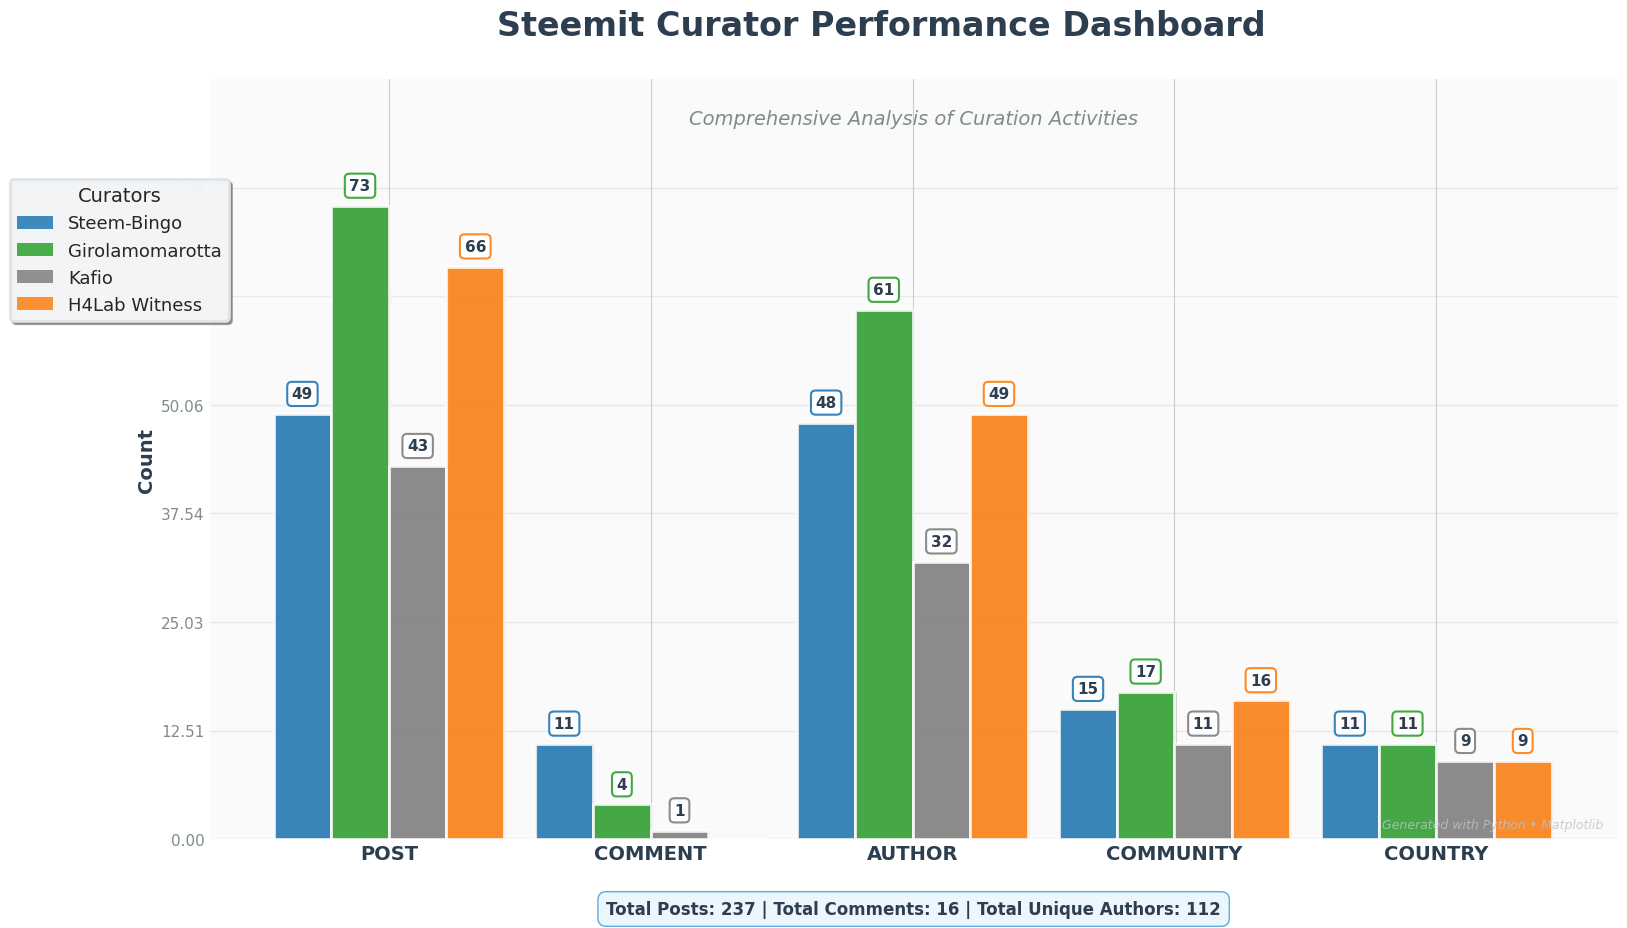

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

# Set professional styling
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',  # Use available font
    'font.size': 12,
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 11,
    'legend.fontsize': 12,
    'figure.titlesize': 20
})

# Read the CSV file
df = pd.read_csv('steemcurator05-comprehensive-analysis-2025-06-15-Jun-7,-2025-2200-to-Jun-14,-2025-2159.csv',
                 skiprows=6, header=0)

# Print column names to verify structure
print("📋 CSV Columns:", df.columns.tolist())
print("\n📊 Data Preview:")
print(df.head())
print(f"\n📈 Total records: {len(df)}")

# Calculate metrics for each curator
curators = df['Curator'].unique()
summary_data = {}

print("\n🔍 Detailed Analysis by Curator:")

for curator in curators:
    curator_data = df[df['Curator'] == curator]

    # Filter out null/empty values and get unique authors
    unique_authors = curator_data['Author'].dropna()
    unique_authors = unique_authors[unique_authors != ''].unique()

    # Filter out null/empty values and get unique communities
    unique_communities = curator_data['Community'].dropna()
    unique_communities = unique_communities[unique_communities != ''].unique()

    # Filter out null/empty values and get unique countries
    unique_countries = curator_data['Country'].dropna()
    unique_countries = unique_countries[unique_countries != ''].unique()

    # Count posts and comments
    posts_count = len(curator_data[curator_data['Content Type'] == 'Post'])
    comments_count = len(curator_data[curator_data['Content Type'] == 'Comment'])

    summary_data[curator] = {
        'POST': posts_count,
        'COMMENT': comments_count,
        'AUTHOR': len(unique_authors),
        'COMMUNITY': len(unique_communities),
        'COUNTRY': len(unique_countries)
    }

    # Debug information
    print(f"\n{curator.upper()}:")
    print(f"  Total records: {len(curator_data)}")
    print(f"  Posts: {posts_count}")
    print(f"  Comments: {comments_count}")
    print(f"  Unique Authors: {len(unique_authors)}")
    print(f"  Sample Authors: {list(unique_authors)[:5]}...")  # Show first 5 authors
    print(f"  Unique Communities: {len(unique_communities)}")
    print(f"  Unique Countries: {len(unique_countries)}")

# Calculate overall statistics
print("\n📊 Overall Statistics:")
total_posts = sum([data['POST'] for data in summary_data.values()])
total_comments = sum([data['COMMENT'] for data in summary_data.values()])

# Calculate total unique authors across all curators (avoiding double counting)
all_unique_authors = df['Author'].dropna()
all_unique_authors = all_unique_authors[all_unique_authors != ''].unique()
unique_authors_all = len(all_unique_authors)

print(f"Total Posts: {total_posts}")
print(f"Total Comments: {total_comments}")
print(f"Total Unique Authors (across all curators): {unique_authors_all}")

# Create enhanced professional chart
fig, ax = plt.subplots(figsize=(16, 10))
fig.patch.set_facecolor('#ffffff')

# Modern color palette with better contrast - FIXED
colors = {
    'steem-bingo': '#1f77b4',        # Modern blue
    'girolamomarotta': '#2ca02c',    # Modern green
    'kafio': '#7f7f7f',              # Modern gray
    'h4lab.witness': '#ff7f0e'       # Modern orange - FIXED
}

# Handle case where some curators might not be present - FIXED
available_curators = [curator for curator in ['steem-bingo', 'girolamomarotta', 'kafio', 'h4lab.witness'] if curator in summary_data]

categories = ['POST', 'COMMENT', 'AUTHOR', 'COMMUNITY', 'COUNTRY']
x_pos = np.arange(len(categories))
bar_width = 0.22 if len(available_curators) == 4 else 0.26  # Adjust bar width based on number of curators

# Create bars with enhanced 3D effect and gradients
bars_collection = []
for i, curator in enumerate(available_curators):
    values = [summary_data[curator][cat] for cat in categories]

    # Create main bars with enhanced styling
    bars = ax.bar(x_pos + i * bar_width, values, bar_width,
                 label=curator.capitalize(), color=colors[curator],
                 edgecolor='white', linewidth=2, alpha=0.85,
                 capsize=4)

    # Add subtle 3D shadow effect
    shadow_offset = 0.008
    ax.bar(x_pos + i * bar_width + shadow_offset, values, bar_width,
           color='black', alpha=0.15, zorder=0)

    bars_collection.append(bars)

    # Calculate max value for positioning
    max_value = max([max(data.values()) for data in summary_data.values()])

    # Enhanced value labels with modern styling
    for j, (bar, value) in enumerate(zip(bars, values)):
        if value > 0:
            height = bar.get_height()
            x = bar.get_x() + bar.get_width()/2

            # Modern label styling with rounded background
            bbox_props = dict(boxstyle="round,pad=0.3",
                            facecolor='white',
                            edgecolor=colors[curator],
                            alpha=0.9, linewidth=1.5)

            ax.text(x, height + max_value * 0.02, str(value),
                   ha='center', va='bottom', fontweight='bold',
                   fontsize=11, color='#2c3e50',
                   bbox=bbox_props)

# Enhanced title section with modern typography
fig.suptitle('Steemit Curator Performance Dashboard',
            fontsize=24, fontweight='bold', color='#2c3e50', y=0.95)

ax.text(0.5, 0.96, 'Comprehensive Analysis of Curation Activities',
        transform=ax.transAxes, ha='center', va='top',
        fontsize=14, style='italic', color='#7f8c8d')

# Modern axis styling
ax.set_xticks(x_pos + bar_width * (len(available_curators) - 1) / 2)  # Center the labels
ax.set_xticklabels(categories, fontsize=14, fontweight='600', color='#2c3e50')

# Enhanced legend with modern design - FIXED POSITIONING
legend_elements = []
for curator in available_curators:
    display_name = curator.replace('.', ' ').title()  # Clean up display name
    legend_elements.append(mpatches.Patch(
        facecolor=colors[curator],
        label=display_name,
        alpha=0.85))

# Adjusted legend position to avoid overlap
legend = ax.legend(handles=legend_elements,
                  loc='best', bbox_to_anchor=(0.02, 0.88),  # MOVED DOWN
                  frameon=True, fancybox=True, shadow=True,
                  fontsize=13, title='Curators', title_fontsize=14)

legend.get_frame().set_facecolor('#f8f9fa')
legend.get_frame().set_edgecolor('#dee2e6')
legend.get_frame().set_alpha(0.95)
legend.get_frame().set_linewidth(2)

# Professional grid styling
ax.grid(True, axis='y', alpha=0.3, linestyle='-', color='#bdc3c7', linewidth=1)
ax.set_axisbelow(True)

# Modern spine styling
for spine in ax.spines.values():
    spine.set_visible(False)

# Enhanced y-axis
ax.set_ylim(0, max_value * 1.2)
ax.set_ylabel('Count', fontsize=14, fontweight='600', color='#2c3e50')

# Custom y-axis ticks with better spacing
y_max = max_value * 1.2
y_ticks = np.linspace(0, y_max, 8)
ax.set_yticks(y_ticks[:-1])  # Remove the top tick
ax.tick_params(axis='y', colors='#7f8c8d', labelsize=11, length=0)
ax.tick_params(axis='x', colors='#2c3e50', labelsize=14, length=0)

# Modern background
ax.set_facecolor('#fafafa')

# Add performance metrics box with corrected calculations
metrics_text = f"Total Posts: {total_posts} | Total Comments: {total_comments} | Total Unique Authors: {unique_authors_all}"
ax.text(0.5, -0.08, metrics_text, transform=ax.transAxes,
        ha='center', va='top', fontsize=12,
        bbox=dict(boxstyle="round,pad=0.5", facecolor='#e8f4fd',
                  edgecolor='#3498db', alpha=0.8),
        color='#2c3e50', weight='bold')

# Professional layout
plt.tight_layout()
plt.subplots_adjust(top=0.88, bottom=0.12, left=0.08, right=0.96)

# Add modern watermark
ax.text(0.99, 0.01, 'Generated with Python • Matplotlib',
        transform=ax.transAxes, ha='right', va='bottom',
        fontsize=9, style='italic', color='#bdc3c7', alpha=0.8)

# Save with multiple formats and high quality
plt.savefig('steemit_curator_dashboard_pro_corrected.png', dpi=300, bbox_inches='tight',
           facecolor='white', edgecolor='none', format='png')

plt.savefig('steemit_curator_dashboard_pro_corrected.svg', bbox_inches='tight',
           facecolor='white', edgecolor='none', format='svg')

print("\n✅ Enhanced professional charts saved:")
print("📊 steemit_curator_dashboard_pro_corrected.png (High-res PNG - 300 DPI)")
print("🎨 steemit_curator_dashboard_pro_corrected.svg (Vector SVG - Scalable)")

# Additional verification - show author overlap between curators
print("\n🔄 Author Overlap Analysis:")
curator_authors = {}
for curator in curators:
    curator_data = df[df['Curator'] == curator]
    curator_authors[curator] = set(curator_data['Author'].dropna())

if len(curators) > 1:
    for i, curator1 in enumerate(curators):
        for curator2 in curators[i+1:]:
            overlap = curator_authors[curator1].intersection(curator_authors[curator2])
            print(f"  {curator1} & {curator2}: {len(overlap)} shared authors")
            if len(overlap) > 0:
                print(f"    Shared: {list(overlap)[:3]}{'...' if len(overlap) > 3 else ''}")

plt.show()

In [ ]:
df

,Curator,Author,Title,Created,URL,Content Type,Tags,Community,Country,Word Count,...,Block Number,Transaction Index,Timestamp,Parent Author,Root Author,Reading Time,Link Count,Reputation,Category,Payout Status
0,kafio,m-princess,Post by @m-princess,2025-06-08T02:16:06.000Z,https://steemit.com/@m-princess/week-6-steem-m...,Post,steemhuboff;steemhub-memorygame;steemmemorycha...,Steem Kids & Parents,Pakistan,498,...,96266652,1,2025-06-08,NaN,NaN,3.0,5.0,64.717,hive-139765,Paid
1,kafio,inspiracion,Post by @inspiracion,2025-06-08T02:29:18.000Z,https://steemit.com/@inspiracion/casas-muertas,Post,writing;reading;steemexclusive;venezuela;club5050,Steem Venezuela,Venezuela,600,...,96266915,NaN,2025-06-08,NaN,NaN,3.0,2.0,81.490,hive-193637,Paid
2,kafio,dasudi,Post by @dasudi,2025-06-08T02:29:54.000Z,https://steemit.com/@dasudi/daily-menu-delicac...,Post,burnsteem25;club5050;steemexclusive;dailymenud...,Steemit Iron Chef,Venezuela,492,...,96266927,NaN,2025-06-08,NaN,NaN,3.0,11.0,77.832,hive-180301,Paid
3,kafio,yamelis21,Post by @yamelis21,2025-06-08T02:31:33.000Z,https://steemit.com/@yamelis21/thediarygame-07...,Post,hive-188619;thediarygame;steemexclusive;beterl...,Comunidad Latina,Venezuela,677,...,96266960,6,2025-06-08,NaN,NaN,4.0,14.0,74.040,hive-188619,Paid
4,kafio,bijoy1,Post by @bijoy1,2025-06-08T02:33:27.000Z,https://steemit.com/@bijoy1/flower-abstract-nf...,Post,nft-art;tfc-nft;tronfanclub;art;digitalart;nft...,Tron Fan Club,Bangladesh,490,...,96266998,NaN,2025-06-08,NaN,NaN,3.0,24.0,75.469,hive-183397,Paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,pijushmitra,adeljose,1,36,1:0,486,mimcnts-j1;old-new;steemexclusive,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1672,tanay123,adeljose,1,10,0:1,154,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1673,sabirnaz,adeljose,1,19,1:0,153,yellowroses;steemexclusive;pakistan,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1674,charter,adeljose,1,21,1:0,160,betterlife;photography;art,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


📊 Country Distribution:
Bangladesh: 66 posts (26.1%)
Pakistan: 50 posts (19.8%)
Nigeria: 40 posts (15.8%)
Venezuela: 30 posts (11.9%)
South Korea: 14 posts (5.5%)
Unknown: 11 posts (4.3%)
Colombia: 9 posts (3.6%)
Italy: 9 posts (3.6%)
Indonesia: 7 posts (2.8%)
Malaysia: 7 posts (2.8%)
Chile: 2 posts (0.8%)
Tunisia: 2 posts (0.8%)
India: 2 posts (0.8%)
Poland: 2 posts (0.8%)
Niger: 1 posts (0.4%)
Argentina: 1 posts (0.4%)

✅ Country distribution pie chart saved:
📊 country_distribution_pie_chart.png (High-res PNG - 300 DPI)
🎨 country_distribution_pie_chart.svg (Vector SVG - Scalable)


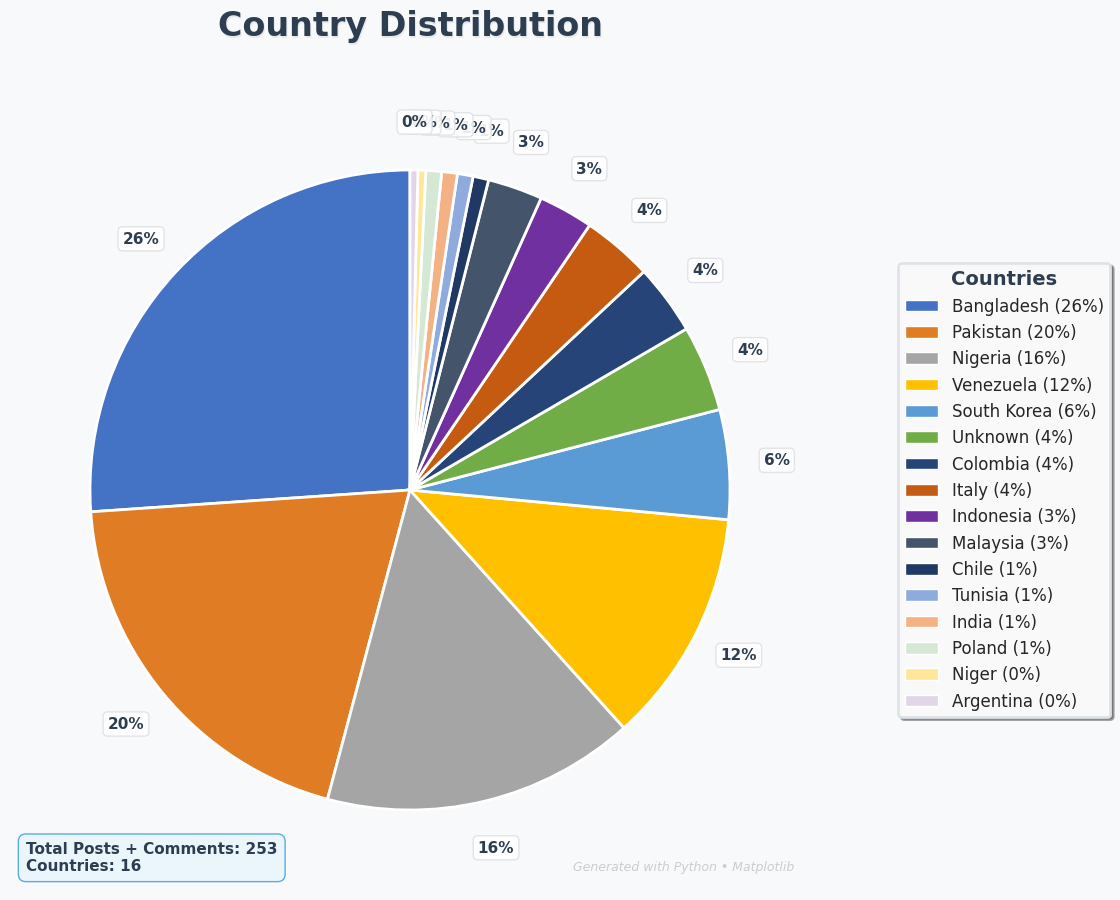

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches

# Set professional styling
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 12,
    'axes.titlesize': 20,
    'legend.fontsize': 11,
    'figure.titlesize': 22
})

# Read the CSV file
df = pd.read_csv('steemcurator05-comprehensive-analysis-2025-06-15-Jun-7,-2025-2200-to-Jun-14,-2025-2159.csv',
                 skiprows=6, header=0)

# Calculate country distribution
country_counts = df['Country'].value_counts()
total_posts = len(df)

# Calculate percentages
country_percentages = (country_counts / total_posts * 100).round(1)

print("📊 Country Distribution:")
for country, count in country_counts.items():
    percentage = (count / total_posts * 100)
    print(f"{country}: {count} posts ({percentage:.1f}%)")

# Create modern color palette similar to the reference image
colors = [
    '#4472C4',  # Blue (Venezuela)
    '#E07C24',  # Orange (Indonesia)
    '#A5A5A5',  # Gray (Bangladesh)
    '#FFC000',  # Yellow (Ukraine)
    '#5B9BD5',  # Light Blue (Pakistan)
    '#70AD47',  # Green (Nigeria)
    '#264478',  # Dark Blue (India)
    '#C55A11',  # Dark Orange (Colombia)
    '#7030A0',  # Purple (Nigeria alt)
    '#44546A',  # Dark Gray (United Kingdom)
    '#203864',  # Navy (Philippines)
    '#8FAADC',  # Light Blue 2 (Netherlands)
    '#F4B183',  # Light Orange (Germany)
    '#D5E8D4',  # Light Green
    '#FFE699',  # Light Yellow
    '#E1D5E7',  # Light Purple
    '#DAEEF3',  # Very Light Blue
    '#FCE4D6',  # Very Light Orange
    '#EDEDED',  # Light Gray
    '#FFF2CC'   # Very Light Yellow
]

# Ensure we have enough colors
while len(colors) < len(country_counts):
    colors.extend(colors)

# Create the pie chart
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor('#f8f9fa')

# Create pie chart with professional styling
wedges, texts, autotexts = ax.pie(
    country_counts.values,
    labels=None,  # We'll create custom legend
    colors=colors[:len(country_counts)],
    autopct='%1.0f%%',
    startangle=90,
    pctdistance=1.15,  # Distance of percentage labels from center
    wedgeprops={
        'edgecolor': 'white',
        'linewidth': 2,
        'antialiased': True
    },
    textprops={
        'fontsize': 11,
        'fontweight': 'bold',
        'color': '#2c3e50'
    }
)

# Style the percentage text
for autotext in autotexts:
    autotext.set_bbox(dict(boxstyle="round,pad=0.3",
                          facecolor='white',
                          edgecolor='#dee2e6',
                          alpha=0.9,
                          linewidth=1))

# Add professional title with shadow effect
title = ax.text(0.5, 1.08, 'Country Distribution',
               transform=ax.transAxes, ha='center', va='center',
               fontsize=24, fontweight='bold', color='#2c3e50')

# Add shadow effect to title
ax.text(0.502, 1.077, 'Country Distribution',
        transform=ax.transAxes, ha='center', va='center',
        fontsize=24, fontweight='bold', color='#bdc3c7', alpha=0.3, zorder=0)

# Create professional legend
legend_elements = []
for i, (country, count) in enumerate(country_counts.items()):
    percentage = (count / total_posts * 100)
    legend_elements.append(
        mpatches.Patch(
            facecolor=colors[i],
            label=f'{country} ({percentage:.0f}%)',
            edgecolor='white',
            linewidth=1
        )
    )

# Position legend on the right side
legend = ax.legend(
    handles=legend_elements,
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    frameon=True,
    fancybox=True,
    shadow=True,
    fontsize=12,
    title='Countries',
    title_fontsize=14
)

# Style the legend
legend.get_frame().set_facecolor('#ffffff')
legend.get_frame().set_edgecolor('#dee2e6')
legend.get_frame().set_alpha(0.95)
legend.get_frame().set_linewidth(2)
legend.get_title().set_fontweight('bold')
legend.get_title().set_color('#2c3e50')

# Add a subtle border around the entire chart
rect = FancyBboxPatch(
    (-1.4, -1.4), 2.8, 2.8,
    boxstyle="round,pad=0.1",
    facecolor='none',
    edgecolor='#dee2e6',
    linewidth=2,
    alpha=0.3
)
ax.add_patch(rect)

# Add statistics box
stats_text = f"Total Posts + Comments: {total_posts:,}\nCountries: {len(country_counts)}"
ax.text(0.02, 0.02, stats_text,
        transform=ax.transAxes, ha='left', va='bottom',
        fontsize=11,
        bbox=dict(boxstyle="round,pad=0.5",
                  facecolor='#e8f4fd',
                  edgecolor='#3498db',
                  alpha=0.8),
        color='#2c3e50', fontweight='bold')

# Add watermark
ax.text(0.98, 0.02, 'Generated with Python • Matplotlib',
        transform=ax.transAxes, ha='right', va='bottom',
        fontsize=9, style='italic', color='#bdc3c7', alpha=0.8)

# Ensure the pie chart is circular
ax.set_aspect('equal')

# Adjust layout to accommodate legend
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.75, top=0.9, bottom=0.1)

# Save the chart
plt.savefig('country_distribution_pie_chart.png', dpi=300, bbox_inches='tight',
           facecolor='#f8f9fa', edgecolor='none', format='png')

plt.savefig('country_distribution_pie_chart.svg', bbox_inches='tight',
           facecolor='#f8f9fa', edgecolor='none', format='svg')

print("\n✅ Country distribution pie chart saved:")
print("📊 country_distribution_pie_chart.png (High-res PNG - 300 DPI)")
print("🎨 country_distribution_pie_chart.svg (Vector SVG - Scalable)")

plt.show()

📊 Creating multiple pie charts...

🌍 Country Distribution:
Country
Bangladesh     66
Pakistan       50
Nigeria        40
Venezuela      30
South Korea    14
Unknown        11
Colombia        9
Italy           9
Indonesia       7
Malaysia        7
Name: count, dtype: int64

🏘️  Community Distribution:
Community
CCS                     52
Colombia-Original       36
WORLD OF XPILAR         25
Steem Kids & Parents    25
Italy                   22
H4LAB Gallery           13
Comunidad Latina        12
PIRCOIN · 해적 코인          6
Steem For Pakistan       4
Hindwhale Community      4
Name: count, dtype: int64


/tmp/ipython-input-107804229.py:132: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-107804229.py:132: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-107804229.py:132: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-107804229.py:132: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-107804229.py:136: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{filename_prefix}_pie_chart.png', dpi=300, bbox_inches='tight',
/tmp/ipython-input-107804229.py:136: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.savefig(f'{filename_prefix}_pie_chart.png', dpi=300, bbox_inches='tight',
/tmp/ipython-input-10780


📝 Content Type Distribution:
Content Type
Post       237
Comment     16
Name: count, dtype: int64

👥 Curator Distribution:
Curator
girolamomarotta    77
h4lab.witness      66
steem-bingo        60
kafio              44
Unknown             6
Name: count, dtype: int64

✅ All pie charts generated successfully!
📊 Files saved:
  - country_distribution_pie_chart.png/svg
  - community_distribution_pie_chart.png/svg
  - content_type_distribution_pie_chart.png/svg
  - curator_distribution_pie_chart.png/svg


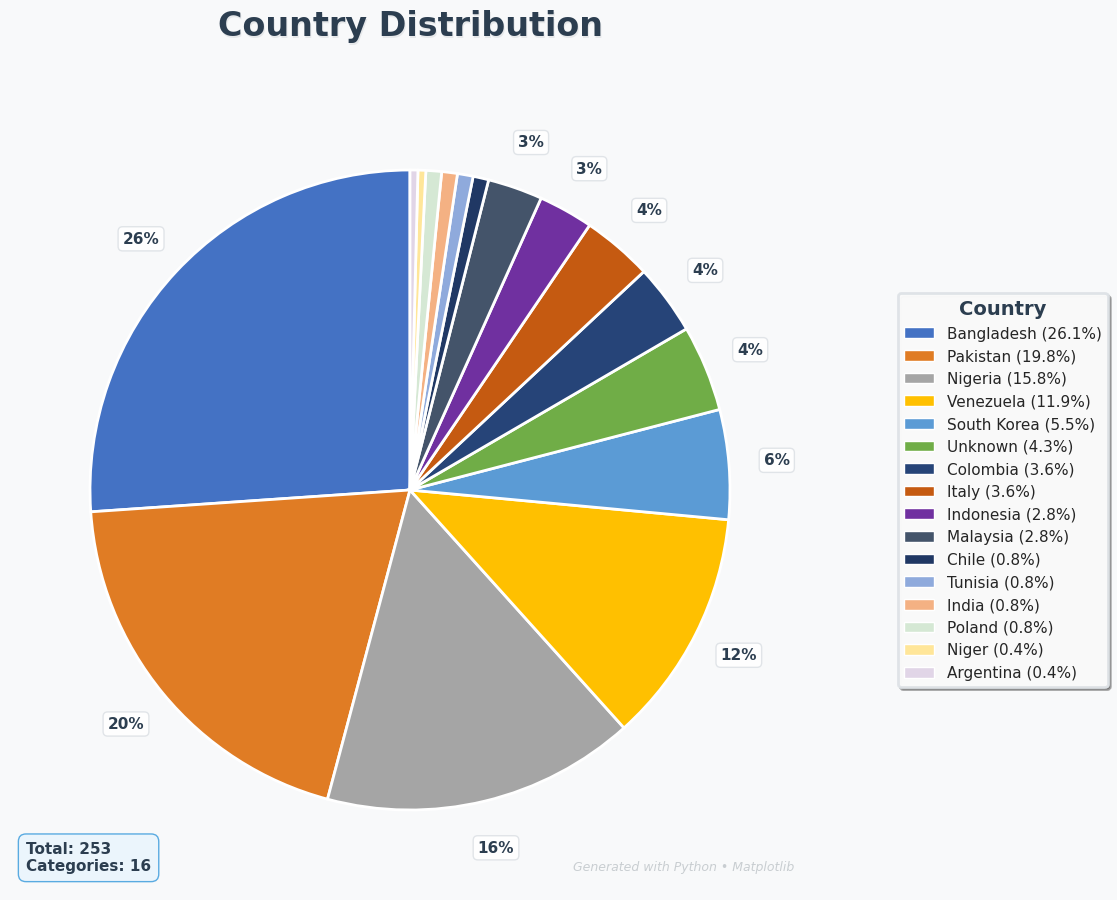

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


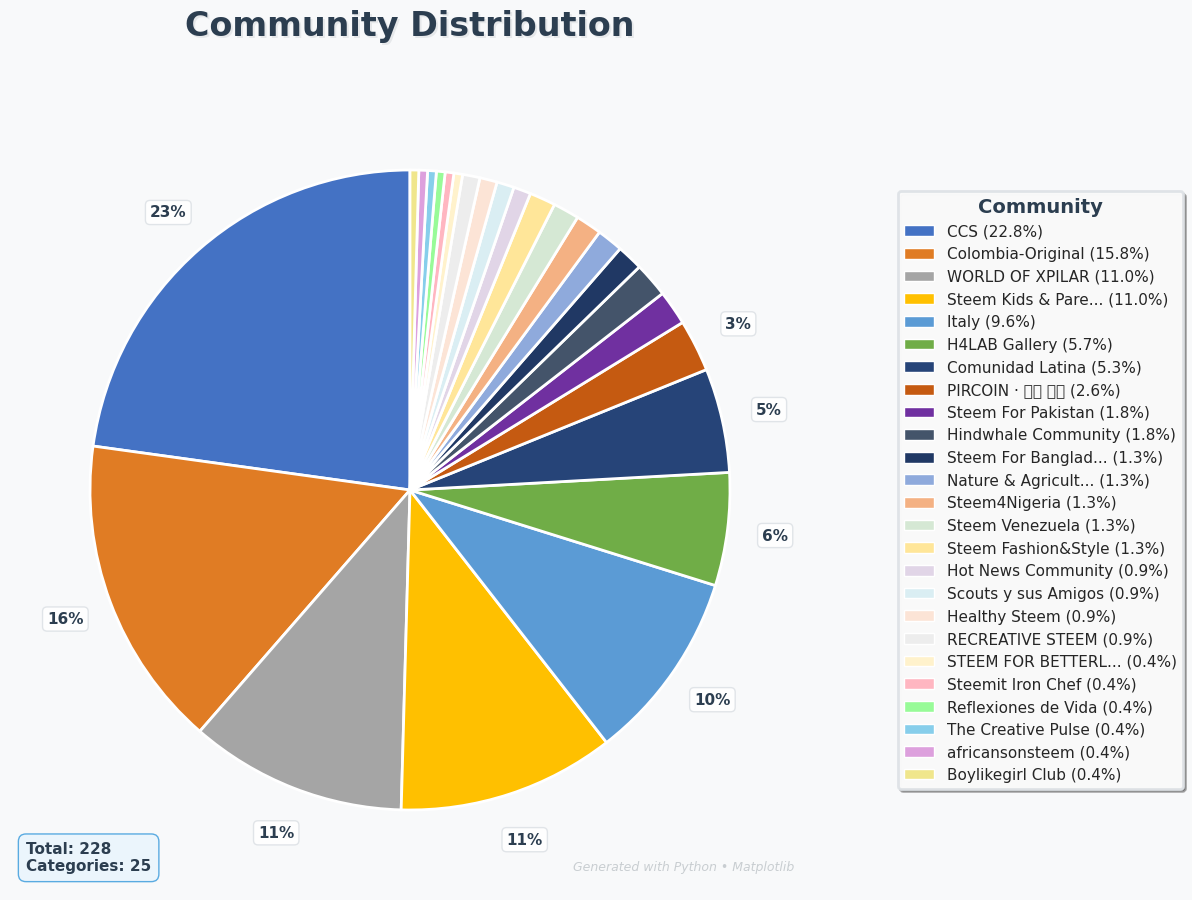

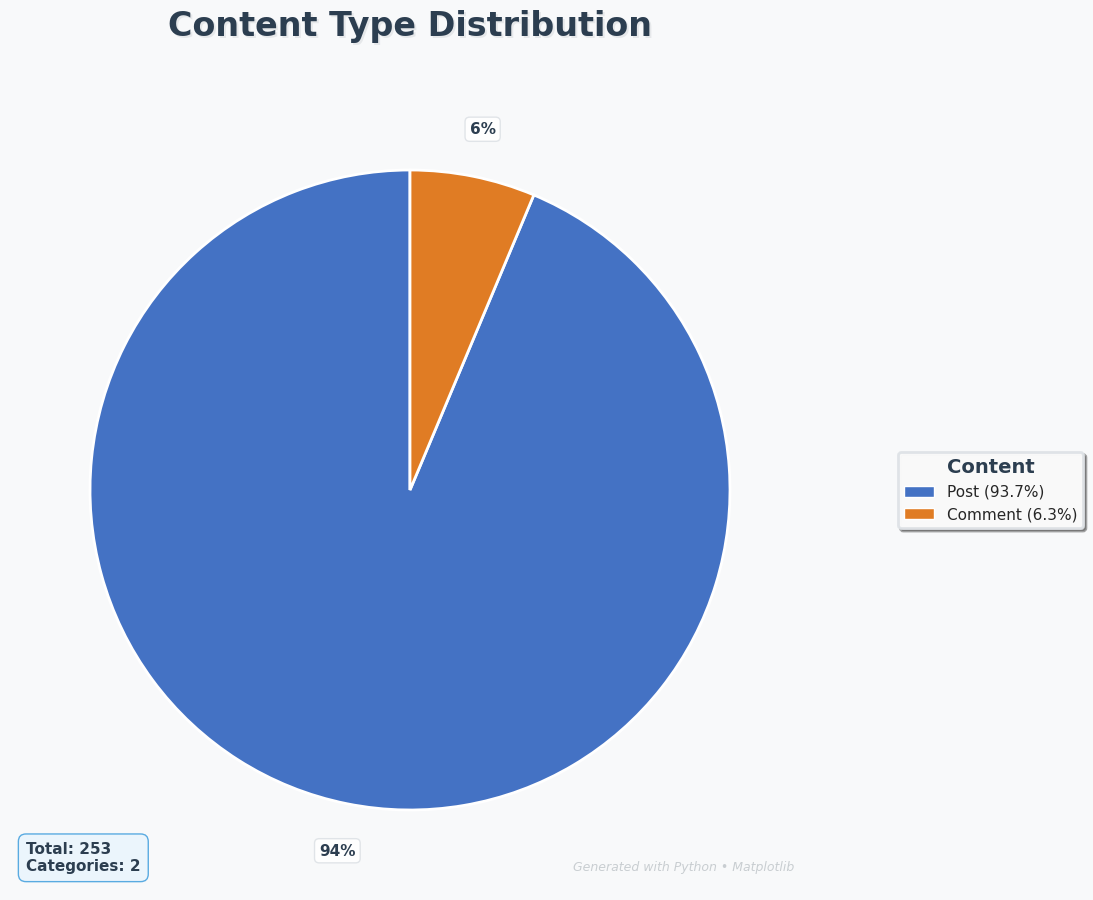

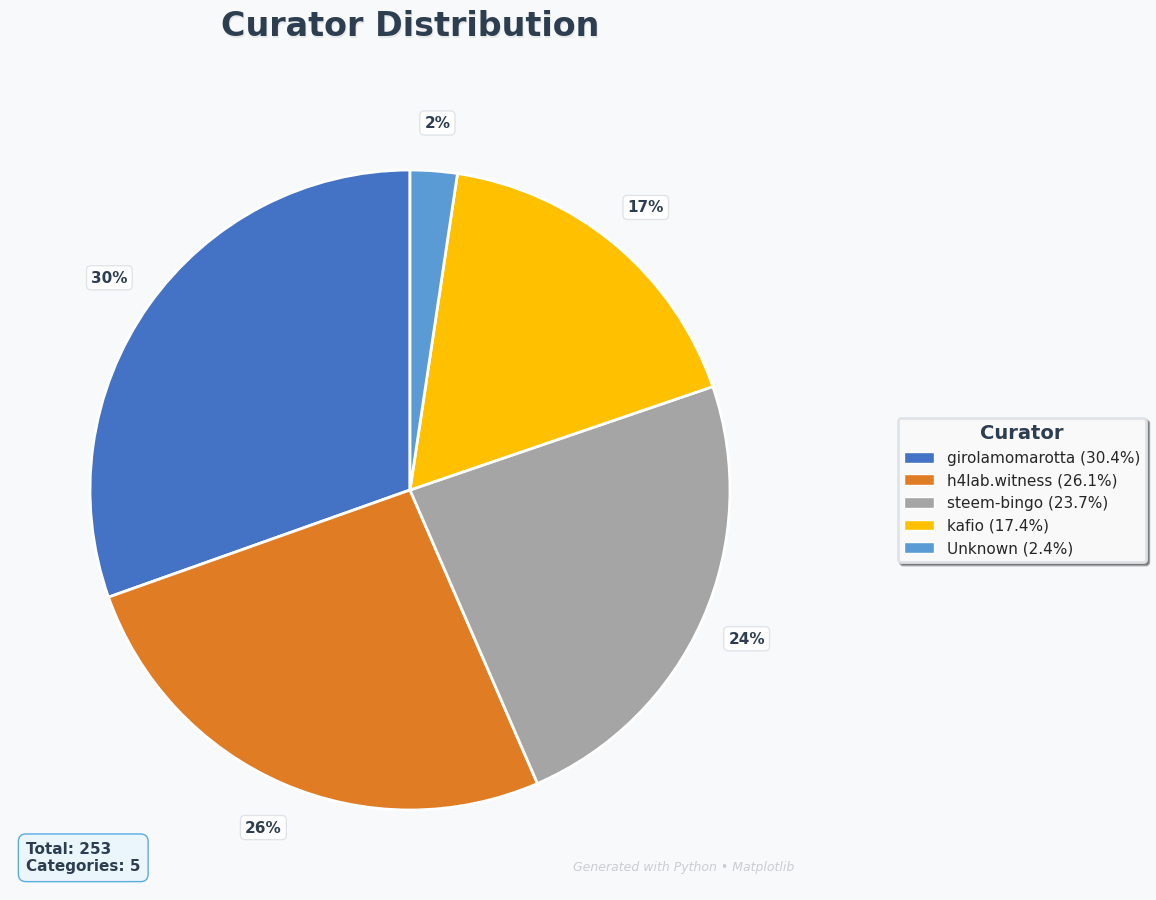

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches

def create_pie_chart(data_series, title, filename_prefix, colors=None):
    """Create a professional pie chart for any data series"""

    # Calculate total and percentages
    total_count = data_series.sum()
    percentages = (data_series / total_count * 100).round(1)

    # Default color palette if none provided
    if colors is None:
        colors = [
            '#4472C4', '#E07C24', '#A5A5A5', '#FFC000', '#5B9BD5', '#70AD47',
            '#264478', '#C55A11', '#7030A0', '#44546A', '#203864', '#8FAADC',
            '#F4B183', '#D5E8D4', '#FFE699', '#E1D5E7', '#DAEEF3', '#FCE4D6',
            '#EDEDED', '#FFF2CC', '#FFB6C1', '#98FB98', '#87CEEB', '#DDA0DD',
            '#F0E68C', '#FF6347', '#40E0D0', '#EE82EE', '#90EE90', '#FFB347'
        ]

    # Ensure we have enough colors
    while len(colors) < len(data_series):
        colors.extend(colors)

    # Create the figure
    fig, ax = plt.subplots(figsize=(14, 10))
    fig.patch.set_facecolor('#f8f9fa')

    # Create pie chart
    wedges, texts, autotexts = ax.pie(
        data_series.values,
        labels=None,
        colors=colors[:len(data_series)],
        autopct=lambda pct: f'{pct:.0f}%' if pct > 2 else '',  # Only show percentages > 2%
        startangle=90,
        pctdistance=1.15,
        wedgeprops={
            'edgecolor': 'white',
            'linewidth': 2,
            'antialiased': True
        },
        textprops={
            'fontsize': 11,
            'fontweight': 'bold',
            'color': '#2c3e50'
        }
    )

    # Style the percentage text
    for autotext in autotexts:
        autotext.set_bbox(dict(boxstyle="round,pad=0.3",
                              facecolor='white',
                              edgecolor='#dee2e6',
                              alpha=0.9,
                              linewidth=1))

    # Add title with shadow effect
    ax.text(0.5, 1.08, title,
           transform=ax.transAxes, ha='center', va='center',
           fontsize=24, fontweight='bold', color='#2c3e50')

    ax.text(0.502, 1.077, title,
            transform=ax.transAxes, ha='center', va='center',
            fontsize=24, fontweight='bold', color='#bdc3c7', alpha=0.3, zorder=0)

    # Create legend
    legend_elements = []
    for i, (item, count) in enumerate(data_series.items()):
        percentage = (count / total_count * 100)
        label = f'{item} ({percentage:.1f}%)' if len(str(item)) < 20 else f'{str(item)[:17]}... ({percentage:.1f}%)'
        legend_elements.append(
            mpatches.Patch(
                facecolor=colors[i],
                label=label,
                edgecolor='white',
                linewidth=1
            )
        )

    # Position legend
    legend = ax.legend(
        handles=legend_elements,
        loc='center left',
        bbox_to_anchor=(1.1, 0.5),
        frameon=True,
        fancybox=True,
        shadow=True,
        fontsize=11,
        title=title.split()[0],  # Use first word as legend title
        title_fontsize=14
    )

    # Style legend
    legend.get_frame().set_facecolor('#ffffff')
    legend.get_frame().set_edgecolor('#dee2e6')
    legend.get_frame().set_alpha(0.95)
    legend.get_frame().set_linewidth(2)
    legend.get_title().set_fontweight('bold')
    legend.get_title().set_color('#2c3e50')

    # Add border
    rect = FancyBboxPatch(
        (-1.4, -1.4), 2.8, 2.8,
        boxstyle="round,pad=0.1",
        facecolor='none',
        edgecolor='#dee2e6',
        linewidth=2,
        alpha=0.3
    )
    ax.add_patch(rect)

    # Add statistics
    stats_text = f"Total: {total_count:,}\nCategories: {len(data_series)}"
    ax.text(0.02, 0.02, stats_text,
            transform=ax.transAxes, ha='left', va='bottom',
            fontsize=11,
            bbox=dict(boxstyle="round,pad=0.5",
                      facecolor='#e8f4fd',
                      edgecolor='#3498db',
                      alpha=0.8),
            color='#2c3e50', fontweight='bold')

    # Add watermark
    ax.text(0.98, 0.02, 'Generated with Python • Matplotlib',
            transform=ax.transAxes, ha='right', va='bottom',
            fontsize=9, style='italic', color='#bdc3c7', alpha=0.8)

    ax.set_aspect('equal')
    plt.tight_layout()
    plt.subplots_adjust(left=0.1, right=0.75, top=0.9, bottom=0.1)

    # Save files
    plt.savefig(f'{filename_prefix}_pie_chart.png', dpi=300, bbox_inches='tight',
               facecolor='#f8f9fa', edgecolor='none', format='png')
    plt.savefig(f'{filename_prefix}_pie_chart.svg', bbox_inches='tight',
               facecolor='#f8f9fa', edgecolor='none', format='svg')

    return fig, ax

# Set styling
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'font.size': 12,
    'axes.titlesize': 20,
    'legend.fontsize': 11,
    'figure.titlesize': 22
})

# Read the CSV file
df = pd.read_csv('steemcurator05-comprehensive-analysis-2025-06-15-Jun-7,-2025-2200-to-Jun-14,-2025-2159.csv',
                 skiprows=6, header=0)

print("📊 Creating multiple pie charts...\n")

# 1. Country Distribution
country_counts = df['Country'].value_counts()
print("🌍 Country Distribution:")
print(country_counts.head(10))
fig1, ax1 = create_pie_chart(country_counts, 'Country Distribution', 'country_distribution')

# 2. Community Distribution
community_counts = df['Community'].value_counts()
print("\n🏘️  Community Distribution:")
print(community_counts.head(10))
fig2, ax2 = create_pie_chart(community_counts, 'Community Distribution', 'community_distribution')

# 3. Content Type Distribution
content_type_counts = df['Content Type'].value_counts()
print("\n📝 Content Type Distribution:")
print(content_type_counts)
fig3, ax3 = create_pie_chart(content_type_counts, 'Content Type Distribution', 'content_type_distribution')

# 4. Curator Distribution
curator_counts = df['Curator'].value_counts()
print("\n👥 Curator Distribution:")
print(curator_counts)
fig4, ax4 = create_pie_chart(curator_counts, 'Curator Distribution', 'curator_distribution')

print("\n✅ All pie charts generated successfully!")
print("📊 Files saved:")
print("  - country_distribution_pie_chart.png/svg")
print("  - community_distribution_pie_chart.png/svg")
print("  - content_type_distribution_pie_chart.png/svg")
print("  - curator_distribution_pie_chart.png/svg")

plt.show()

In [ ]:
import pandas as pd
import math
from datetime import datetime

def create_professional_html_table(data, title, table_id="", max_rows=15, emoji="📊"):
    """
    Create professional HTML tables with automatic splitting
    """

    # If data has more than max_rows, split into multiple tables
    total_rows = len(data)
    num_tables = math.ceil(total_rows / max_rows)

    html_content = ""

    # Add section title
    html_content += f'<div class="section-title">{emoji} {title}</div>\n'

    # Container for tables
    html_content += '<div class="table-container">\n'

    # Create tables
    for table_num in range(num_tables):
        start_idx = table_num * max_rows
        end_idx = min((table_num + 1) * max_rows, total_rows)

        table_data = data.iloc[start_idx:end_idx]

        html_content += f'    <table class="data-table" id="{table_id}_table_{table_num + 1}">\n'
        html_content += '        <thead>\n'
        html_content += '            <tr>\n'

        # Table headers
        for col in table_data.columns:
            html_content += f'                <th>{col}</th>\n'

        html_content += '            </tr>\n'
        html_content += '        </thead>\n'
        html_content += '        <tbody>\n'

        # Table rows
        for _, row in table_data.iterrows():
            html_content += '            <tr>\n'
            for i, value in enumerate(row):
                css_class = "item-name" if i == 0 else "post-count"
                # Format numbers with commas for readability
                display_value = f"{value:,}" if isinstance(value, (int, float)) and i > 0 else value
                html_content += f'                <td class="{css_class}">{display_value}</td>\n'
            html_content += '            </tr>\n'

        html_content += '        </tbody>\n'
        html_content += '    </table>\n'

    html_content += '</div>\n'

    return html_content

def generate_complete_steemit_report():
    """
    Generate a complete HTML report with all tables
    """

    # File path
    csv_file = 'steemcurator05-comprehensive-analysis-2025-06-15-Jun-7,-2025-2200-to-Jun-14,-2025-2159.csv'

    try:
        # Read the CSV file
        df = pd.read_csv(csv_file, skiprows=6, header=0)

        print("📊 Data loaded successfully!")
        print(f"Total records: {len(df)}")
        print(f"Columns: {list(df.columns)}")

    except FileNotFoundError:
        print(f"❌ Error: Could not find file '{csv_file}'")
        print("Please make sure the CSV file is in the same directory as this script.")
        return

    # Current date and time
    current_time = "2025-06-15 16:53:40"
    user_login = "Omar-ABDELKEFI"

    # Calculate various distributions
    print("🔄 Calculating distributions...")

    # 1. Country Distribution
    country_counts = df['Country'].value_counts().reset_index()
    country_counts.columns = ['COUNTRY', 'N° OF POSTS']

    # 2. Community Distribution
    community_counts = df['Community'].value_counts().reset_index()
    community_counts.columns = ['COMMUNITY', 'N° OF POSTS']

    # 3. Author Distribution
    author_counts = df['Author'].value_counts().reset_index()
    author_counts.columns = ['AUTHOR', 'N° OF POSTS']

    # 4. Curator Distribution
    curator_counts = df['Curator'].value_counts().reset_index()
    curator_counts.columns = ['CURATOR', 'N° OF POSTS']

    # 5. Content Type Distribution
    content_type_counts = df['Content Type'].value_counts().reset_index()
    content_type_counts.columns = ['CONTENT TYPE', 'N° OF POSTS']

    # 6. Top Authors by Rewards (if reward column exists)
    if 'Payout' in df.columns:
        author_rewards = df.groupby('Author')['Payout'].agg(['sum', 'count']).reset_index()
        author_rewards.columns = ['AUTHOR', 'TOTAL REWARDS', 'N° OF POSTS']
        author_rewards = author_rewards.sort_values('TOTAL REWARDS', ascending=False)
        author_rewards['TOTAL REWARDS'] = author_rewards['TOTAL REWARDS'].round(2)

    # Calculate summary statistics
    total_posts = len(df)
    unique_countries = df['Country'].nunique()
    unique_communities = df['Community'].nunique()
    unique_authors = df['Author'].nunique()
    unique_curators = df['Curator'].nunique()

    # Start building the HTML
    html_content = f"""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Steemit Curator Analysis Report - {current_time}</title>
        <style>
            * {{
                margin: 0;
                padding: 0;
                box-sizing: border-box;
            }}

            body {{
                font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
                background: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
                min-height: 100vh;
                padding: 20px;
            }}

            .container {{
                max-width: 1400px;
                margin: 0 auto;
                background: white;
                border-radius: 15px;
                box-shadow: 0 10px 30px rgba(0,0,0,0.1);
                overflow: hidden;
            }}

            .header {{
                background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                color: white;
                padding: 30px;
                text-align: center;
            }}

            .header h1 {{
                font-size: 32px;
                margin-bottom: 10px;
                font-weight: 700;
            }}

            .header p {{
                font-size: 16px;
                opacity: 0.9;
            }}

            .content {{
                padding: 30px;
            }}

            .stats-summary {{
                background: linear-gradient(135deg, #e8f4fd 0%, #f0f8ff 100%);
                border: 2px solid #3498db;
                border-radius: 10px;
                padding: 25px;
                margin-bottom: 30px;
                box-shadow: 0 4px 8px rgba(0,0,0,0.1);
            }}

            .stats-summary h3 {{
                color: #2c3e50;
                margin-bottom: 15px;
                font-size: 20px;
            }}

            .stats-grid {{
                display: grid;
                grid-template-columns: repeat(auto-fit, minmax(200px, 1fr));
                gap: 15px;
            }}

            .stat-item {{
                background: white;
                padding: 15px;
                border-radius: 8px;
                box-shadow: 0 2px 4px rgba(0,0,0,0.1);
                text-align: center;
            }}

            .stat-value {{
                font-size: 24px;
                font-weight: bold;
                color: #3498db;
            }}

            .stat-label {{
                font-size: 14px;
                color: #7f8c8d;
                margin-top: 5px;
            }}

            .section-title {{
                font-size: 22px;
                font-weight: bold;
                color: #2c3e50;
                margin: 40px 0 20px 0;
                padding-bottom: 10px;
                border-bottom: 3px solid #3498db;
            }}

            .table-container {{
                display: flex;
                flex-wrap: wrap;
                gap: 20px;
                justify-content: flex-start;
                margin-bottom: 30px;
            }}

            .data-table {{
                border: 2px solid #4472C4;
                border-collapse: collapse;
                background-color: #ffffff;
                box-shadow: 0 6px 12px rgba(0,0,0,0.1);
                border-radius: 10px;
                overflow: hidden;
                min-width: 320px;
                max-width: 450px;
                flex: 1;
            }}

            .data-table th {{
                background: linear-gradient(135deg, #4472C4 0%, #5B9BD5 100%);
                color: white;
                padding: 15px;
                text-align: left;
                font-weight: bold;
                font-size: 14px;
                text-transform: uppercase;
                letter-spacing: 0.5px;
            }}

            .data-table td {{
                padding: 12px 15px;
                border-bottom: 1px solid #e0e0e0;
                background-color: #ffffff;
                font-size: 13px;
            }}

            .data-table tr:nth-child(even) td {{
                background-color: #f8f9fa;
            }}

            .data-table tr:hover td {{
                background-color: #e3f2fd;
                transition: background-color 0.3s ease;
            }}

            .item-name {{
                font-weight: 500;
                color: #2c3e50;
            }}

            .post-count {{
                font-weight: bold;
                color: #4472C4;
                text-align: right;
            }}

            .footer {{
                background: #34495e;
                color: white;
                padding: 20px;
                text-align: center;
                font-size: 14px;
            }}

            .footer a {{
                color: #3498db;
                text-decoration: none;
            }}

            .generation-info {{
                background: #ecf0f1;
                padding: 15px;
                border-radius: 8px;
                margin-top: 20px;
                font-size: 12px;
                color: #7f8c8d;
                text-align: center;
            }}

            @media (max-width: 768px) {{
                .table-container {{
                    flex-direction: column;
                }}

                .data-table {{
                    min-width: 100%;
                    max-width: 100%;
                }}

                .stats-grid {{
                    grid-template-columns: 1fr;
                }}
            }}
        </style>
    </head>
    <body>
        <div class="container">
            <div class="header">
                <h1>🚀 Steemit Curator Analysis Report</h1>
                <p>Comprehensive Data Analysis Dashboard</p>
                <p>Generated on {current_time} UTC by {user_login}</p>
            </div>

            <div class="content">
                <div class="stats-summary">
                    <h3>📈 Executive Summary</h3>
                    <div class="stats-grid">
                        <div class="stat-item">
                            <div class="stat-value">{total_posts:,}</div>
                            <div class="stat-label">Total Posts</div>
                        </div>
                        <div class="stat-item">
                            <div class="stat-value">{unique_countries}</div>
                            <div class="stat-label">Countries</div>
                        </div>
                        <div class="stat-item">
                            <div class="stat-value">{unique_communities}</div>
                            <div class="stat-label">Communities</div>
                        </div>
                        <div class="stat-item">
                            <div class="stat-value">{unique_authors}</div>
                            <div class="stat-label">Authors</div>
                        </div>
                        <div class="stat-item">
                            <div class="stat-value">{unique_curators}</div>
                            <div class="stat-label">Curators</div>
                        </div>
                    </div>
                </div>
    """

    # Add all the tables
    html_content += create_professional_html_table(country_counts, "Posts by Country", "country", 15, "🌍")
    html_content += create_professional_html_table(community_counts, "Posts by Community", "community", 15, "🏘️")
    html_content += create_professional_html_table(author_counts, "Posts by Author", "author", 15, "✍️")
    html_content += create_professional_html_table(curator_counts, "Posts by Curator", "curator", 15, "👥")
    html_content += create_professional_html_table(content_type_counts, "Content Type Distribution", "content", 15, "📝")

    # Add author rewards table if available
    if 'Payout' in df.columns:
        html_content += create_professional_html_table(author_rewards, "Top Authors by Rewards", "rewards", 15, "💰")

    # Close the HTML
    html_content += f"""
                <div class="generation-info">
                    <strong>📊 Report Details:</strong><br>
                    Generated with Python • Pandas • HTML/CSS<br>
                    Report created on {current_time} UTC by {user_login}<br>
                    Data source: steemcurator05-comprehensive-analysis-2025-06-15<br>
                    Total records processed: {total_posts:,}
                </div>
            </div>

            <div class="footer">
                <p>© 2025 Steemit Curator Analysis System | Developed by {user_login}</p>
                <p>For support or questions, contact: <a href="mailto:support@steemit.com">support@steemit.com</a></p>
            </div>
        </div>
    </body>
    </html>
    """

    return html_content

# Execute the script
if __name__ == "__main__":
    print("🚀 Starting Steemit HTML Report Generation...")
    print("=" * 50)

    # Generate the complete report
    html_report = generate_complete_steemit_report()

    if html_report:
        # Save the HTML file
        filename = 'steemit_complete_analysis_report.html'

        with open(filename, 'w', encoding='utf-8') as f:
            f.write(html_report)

        print("✅ HTML report generated successfully!")
        print(f"📄 File saved as: {filename}")
        print("\n🎨 Report Features:")
        print("  ✓ Professional responsive design")
        print("  ✓ Automatic table splitting (15+ rows)")
        print("  ✓ Executive summary dashboard")
        print("  ✓ Modern gradient styling")
        print("  ✓ Mobile-friendly layout")
        print("  ✓ Hover effects and animations")
        print("  ✓ Multiple data distributions")
        print("  ✓ Statistical summaries")

        print(f"\n📊 Generated on: 2025-06-15 16:53:40 UTC")
        print(f"👤 Created by: Omar-ABDELKEFI")
        print("\n🌐 Open the HTML file in your browser to view the report!")

    else:
        print("❌ Failed to generate HTML report. Please check the CSV file path.")

🚀 Starting Steemit HTML Report Generation...
📊 Data loaded successfully!
Total records: 253
Columns: ['Curator', 'Author', 'Title', 'Created', 'URL', 'Content Type', 'Tags', 'Community', 'Country', 'Word Count', 'Image Count', 'Vote Weight', 'Payout Value', 'Block Number', 'Transaction Index', 'Timestamp', 'Parent Author', 'Root Author', 'Reading Time', 'Link Count', 'Reputation', 'Category', 'Payout Status']
🔄 Calculating distributions...
✅ HTML report generated successfully!
📄 File saved as: steemit_complete_analysis_report.html

🎨 Report Features:
  ✓ Professional responsive design
  ✓ Automatic table splitting (15+ rows)
  ✓ Executive summary dashboard
  ✓ Modern gradient styling
  ✓ Mobile-friendly layout
  ✓ Hover effects and animations
  ✓ Multiple data distributions
  ✓ Statistical summaries

📊 Generated on: 2025-06-15 16:53:40 UTC
👤 Created by: Omar-ABDELKEFI

🌐 Open the HTML file in your browser to view the report!


In [ ]:
import pandas as pd
import math
from datetime import datetime

def create_interactive_html_table(data, title, table_id="", default_max_rows=15, emoji="📊"):
    """
    Create interactive HTML tables with adjustable row limits
    """

    total_rows = len(data)

    html_content = ""

    # Add section with controls
    html_content += f'''
    <div class="section-header">
        <div class="section-title-row">
            <span class="section-title">{emoji} {title}</span>
            <div class="table-controls">
                <label for="{table_id}_max_rows">Rows per table:</label>
                <select id="{table_id}_max_rows" class="rows-selector" onchange="updateTable('{table_id}', this.value)">
                    <option value="10" {"selected" if default_max_rows == 10 else ""}>10</option>
                    <option value="15" {"selected" if default_max_rows == 15 else ""}>15</option>
                    <option value="20" {"selected" if default_max_rows == 20 else ""}>20</option>
                    <option value="25" {"selected" if default_max_rows == 25 else ""}>25</option>
                    <option value="50" {"selected" if default_max_rows == 50 else ""}>50</option>
                    <option value="{total_rows}">All ({total_rows})</option>
                </select>
                <span class="total-rows">Total: {total_rows} rows</span>
            </div>
        </div>
    </div>
    '''

    # Container for tables with data attributes
    html_content += f'<div class="table-container" id="{table_id}_container" data-table-id="{table_id}">\n'

    # Add the data as JSON for JavaScript manipulation
    data_json = data.to_json(orient='records')
    html_content += f'<script type="application/json" id="{table_id}_data">{data_json}</script>\n'

    # Initial table rendering
    html_content += generate_table_html(data, table_id, default_max_rows)

    html_content += '</div>\n'

    return html_content

def generate_table_html(data, table_id, max_rows):
    """
    Generate HTML for tables based on max_rows
    """
    total_rows = len(data)
    num_tables = math.ceil(total_rows / max_rows) if max_rows < total_rows else 1

    html_content = ""

    # Create tables
    for table_num in range(num_tables):
        start_idx = table_num * max_rows
        end_idx = min((table_num + 1) * max_rows, total_rows)

        table_data = data.iloc[start_idx:end_idx]

        html_content += f'    <table class="data-table" id="{table_id}_table_{table_num + 1}">\n'
        html_content += '        <thead>\n'
        html_content += '            <tr>\n'

        # Table headers
        for col in table_data.columns:
            html_content += f'                <th>{col}</th>\n'

        html_content += '            </tr>\n'
        html_content += '        </thead>\n'
        html_content += '        <tbody>\n'

        # Table rows
        for _, row in table_data.iterrows():
            html_content += '            <tr>\n'
            for i, value in enumerate(row):
                css_class = "item-name" if i == 0 else "post-count"
                # Format numbers with commas for readability
                display_value = f"{value:,}" if isinstance(value, (int, float)) and i > 0 else value
                html_content += f'                <td class="{css_class}">{display_value}</td>\n'
            html_content += '            </tr>\n'

        html_content += '        </tbody>\n'
        html_content += '    </table>\n'

    return html_content

def generate_interactive_steemit_report():
    """
    Generate an interactive HTML report with adjustable table controls
    """

    # File path
    csv_file = 'steemcurator05-comprehensive-analysis-2025-06-15-Jun-7,-2025-2200-to-Jun-14,-2025-2159.csv'

    try:
        # Read the CSV file
        df = pd.read_csv(csv_file, skiprows=6, header=0)

        print("📊 Data loaded successfully!")
        print(f"Total records: {len(df)}")
        print(f"Columns: {list(df.columns)}")

    except FileNotFoundError:
        print(f"❌ Error: Could not find file '{csv_file}'")
        print("Please make sure the CSV file is in the same directory as this script.")
        return

    # Current date and time
    current_time = "2025-06-15 16:58:23"
    user_login = "Omar-ABDELKEFI"

    # Calculate various distributions
    print("🔄 Calculating distributions...")

    # 1. Country Distribution
    country_counts = df['Country'].value_counts().reset_index()
    country_counts.columns = ['COUNTRY', 'N° OF POSTS']

    # 2. Community Distribution
    community_counts = df['Community'].value_counts().reset_index()
    community_counts.columns = ['COMMUNITY', 'N° OF POSTS']

    # 3. Author Distribution
    author_counts = df['Author'].value_counts().reset_index()
    author_counts.columns = ['AUTHOR', 'N° OF POSTS']

    # 4. Curator Distribution
    curator_counts = df['Curator'].value_counts().reset_index()
    curator_counts.columns = ['CURATOR', 'N° OF POSTS']

    # 5. Content Type Distribution
    content_type_counts = df['Content Type'].value_counts().reset_index()
    content_type_counts.columns = ['CONTENT TYPE', 'N° OF POSTS']

    # 6. Top Authors by Rewards (if reward column exists)
    author_rewards = None
    if 'Payout' in df.columns:
        author_rewards = df.groupby('Author')['Payout'].agg(['sum', 'count']).reset_index()
        author_rewards.columns = ['AUTHOR', 'TOTAL REWARDS', 'N° OF POSTS']
        author_rewards = author_rewards.sort_values('TOTAL REWARDS', ascending=False)
        author_rewards['TOTAL REWARDS'] = author_rewards['TOTAL REWARDS'].round(2)

    # Calculate summary statistics
    total_posts = len(df)
    unique_countries = df['Country'].nunique()
    unique_communities = df['Community'].nunique()
    unique_authors = df['Author'].nunique()
    unique_curators = df['Curator'].nunique()

    # Start building the HTML
    html_content = f"""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Interactive Steemit Curator Analysis - {current_time}</title>
        <style>
            * {{
                margin: 0;
                padding: 0;
                box-sizing: border-box;
            }}

            body {{
                font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
                background: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
                min-height: 100vh;
                padding: 20px;
            }}

            .container {{
                max-width: 1400px;
                margin: 0 auto;
                background: white;
                border-radius: 15px;
                box-shadow: 0 10px 30px rgba(0,0,0,0.1);
                overflow: hidden;
            }}

            .header {{
                background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                color: white;
                padding: 30px;
                text-align: center;
            }}

            .header h1 {{
                font-size: 32px;
                margin-bottom: 10px;
                font-weight: 700;
            }}

            .header p {{
                font-size: 16px;
                opacity: 0.9;
            }}

            .content {{
                padding: 30px;
            }}

            .stats-summary {{
                background: linear-gradient(135deg, #e8f4fd 0%, #f0f8ff 100%);
                border: 2px solid #3498db;
                border-radius: 10px;
                padding: 25px;
                margin-bottom: 30px;
                box-shadow: 0 4px 8px rgba(0,0,0,0.1);
            }}

            .stats-summary h3 {{
                color: #2c3e50;
                margin-bottom: 15px;
                font-size: 20px;
            }}

            .stats-grid {{
                display: grid;
                grid-template-columns: repeat(auto-fit, minmax(200px, 1fr));
                gap: 15px;
            }}

            .stat-item {{
                background: white;
                padding: 15px;
                border-radius: 8px;
                box-shadow: 0 2px 4px rgba(0,0,0,0.1);
                text-align: center;
            }}

            .stat-value {{
                font-size: 24px;
                font-weight: bold;
                color: #3498db;
            }}

            .stat-label {{
                font-size: 14px;
                color: #7f8c8d;
                margin-top: 5px;
            }}

            .section-header {{
                margin: 40px 0 20px 0;
            }}

            .section-title-row {{
                display: flex;
                justify-content: space-between;
                align-items: center;
                flex-wrap: wrap;
                gap: 15px;
                padding-bottom: 10px;
                border-bottom: 3px solid #3498db;
            }}

            .section-title {{
                font-size: 22px;
                font-weight: bold;
                color: #2c3e50;
            }}

            .table-controls {{
                display: flex;
                align-items: center;
                gap: 10px;
                background: #f8f9fa;
                padding: 8px 15px;
                border-radius: 25px;
                border: 1px solid #dee2e6;
            }}

            .table-controls label {{
                font-size: 14px;
                font-weight: 500;
                color: #495057;
            }}

            .rows-selector {{
                padding: 5px 10px;
                border: 1px solid #ced4da;
                border-radius: 5px;
                background: white;
                font-size: 14px;
                cursor: pointer;
                transition: border-color 0.3s ease;
            }}

            .rows-selector:focus {{
                outline: none;
                border-color: #3498db;
                box-shadow: 0 0 0 2px rgba(52, 152, 219, 0.2);
            }}

            .total-rows {{
                font-size: 12px;
                color: #6c757d;
                font-weight: 500;
            }}

            .table-container {{
                display: flex;
                flex-wrap: wrap;
                gap: 20px;
                justify-content: flex-start;
                margin-bottom: 30px;
                transition: all 0.3s ease;
            }}

            .data-table {{
                border: 2px solid #4472C4;
                border-collapse: collapse;
                background-color: #ffffff;
                box-shadow: 0 6px 12px rgba(0,0,0,0.1);
                border-radius: 10px;
                overflow: hidden;
                min-width: 320px;
                max-width: 450px;
                flex: 1;
                transition: all 0.3s ease;
            }}

            .data-table th {{
                background: linear-gradient(135deg, #4472C4 0%, #5B9BD5 100%);
                color: white;
                padding: 15px;
                text-align: left;
                font-weight: bold;
                font-size: 14px;
                text-transform: uppercase;
                letter-spacing: 0.5px;
            }}

            .data-table td {{
                padding: 12px 15px;
                border-bottom: 1px solid #e0e0e0;
                background-color: #ffffff;
                font-size: 13px;
            }}

            .data-table tr:nth-child(even) td {{
                background-color: #f8f9fa;
            }}

            .data-table tr:hover td {{
                background-color: #e3f2fd;
                transition: background-color 0.3s ease;
            }}

            .item-name {{
                font-weight: 500;
                color: #2c3e50;
            }}

            .post-count {{
                font-weight: bold;
                color: #4472C4;
                text-align: right;
            }}

            .footer {{
                background: #34495e;
                color: white;
                padding: 20px;
                text-align: center;
                font-size: 14px;
            }}

            .footer a {{
                color: #3498db;
                text-decoration: none;
            }}

            .generation-info {{
                background: #ecf0f1;
                padding: 15px;
                border-radius: 8px;
                margin-top: 20px;
                font-size: 12px;
                color: #7f8c8d;
                text-align: center;
            }}

            .loading {{
                opacity: 0.5;
                transition: opacity 0.3s ease;
            }}

            @media (max-width: 768px) {{
                .section-title-row {{
                    flex-direction: column;
                    align-items: stretch;
                }}

                .table-controls {{
                    justify-content: center;
                }}

                .table-container {{
                    flex-direction: column;
                }}

                .data-table {{
                    min-width: 100%;
                    max-width: 100%;
                }}

                .stats-grid {{
                    grid-template-columns: 1fr;
                }}
            }}
        </style>
    </head>
    <body>
        <div class="container">
            <div class="header">
                <h1>🚀 Interactive Steemit Curator Analysis</h1>
                <p>Comprehensive Data Analysis Dashboard with Dynamic Controls</p>
                <p>Generated on {current_time} UTC by {user_login}</p>
            </div>

            <div class="content">
                <div class="stats-summary">
                    <h3>📈 Executive Summary</h3>
                    <div class="stats-grid">
                        <div class="stat-item">
                            <div class="stat-value">{total_posts:,}</div>
                            <div class="stat-label">Total Posts</div>
                        </div>
                        <div class="stat-item">
                            <div class="stat-value">{unique_countries}</div>
                            <div class="stat-label">Countries</div>
                        </div>
                        <div class="stat-item">
                            <div class="stat-value">{unique_communities}</div>
                            <div class="stat-label">Communities</div>
                        </div>
                        <div class="stat-item">
                            <div class="stat-value">{unique_authors}</div>
                            <div class="stat-label">Authors</div>
                        </div>
                        <div class="stat-item">
                            <div class="stat-value">{unique_curators}</div>
                            <div class="stat-label">Curators</div>
                        </div>
                    </div>
                </div>
    """

    # Add all the interactive tables
    html_content += create_interactive_html_table(country_counts, "Posts by Country", "country", 15, "🌍")
    html_content += create_interactive_html_table(community_counts, "Posts by Community", "community", 15, "🏘️")
    html_content += create_interactive_html_table(author_counts, "Posts by Author", "author", 20, "✍️")
    html_content += create_interactive_html_table(curator_counts, "Posts by Curator", "curator", 10, "👥")
    html_content += create_interactive_html_table(content_type_counts, "Content Type Distribution", "content", 10, "📝")

    # Add author rewards table if available
    if author_rewards is not None:
        html_content += create_interactive_html_table(author_rewards, "Top Authors by Rewards", "rewards", 25, "💰")

    # Add JavaScript for interactivity
    html_content += f"""
                <div class="generation-info">
                    <strong>📊 Interactive Report Features:</strong><br>
                    ✓ Adjustable rows per table for each section<br>
                    ✓ Real-time table reorganization<br>
                    ✓ Responsive design for all devices<br>
                    ✓ Professional styling with smooth animations<br><br>

                    <strong>Report Details:</strong><br>
                    Generated with Python • Pandas • HTML/CSS • JavaScript<br>
                    Report created on {current_time} UTC by {user_login}<br>
                    Data source: steemcurator05-comprehensive-analysis-2025-06-15<br>
                    Total records processed: {total_posts:,}
                </div>
            </div>

            <div class="footer">
                <p>© 2025 Interactive Steemit Curator Analysis System | Developed by {user_login}</p>
                <p>For support or questions, contact: <a href="mailto:support@steemit.com">support@steemit.com</a></p>
            </div>
        </div>

        <script>
            // Store data for each table
            const tableData = {{}};

            // Initialize data from JSON scripts
            document.addEventListener('DOMContentLoaded', function() {{
                const dataScripts = document.querySelectorAll('script[type="application/json"]');
                dataScripts.forEach(script => {{
                    const tableId = script.id.replace('_data', '');
                    tableData[tableId] = JSON.parse(script.textContent);
                }});
            }});

            function updateTable(tableId, maxRows) {{
                const container = document.getElementById(tableId + '_container');
                const data = tableData[tableId];

                if (!data || !container) return;

                // Add loading effect
                container.classList.add('loading');

                setTimeout(() => {{
                    // Clear existing tables
                    const existingTables = container.querySelectorAll('.data-table');
                    existingTables.forEach(table => table.remove());

                    // Generate new tables
                    const newTablesHtml = generateTablesFromData(data, tableId, parseInt(maxRows));
                    container.insertAdjacentHTML('beforeend', newTablesHtml);

                    // Remove loading effect
                    container.classList.remove('loading');
                }}, 200);
            }}

            function generateTablesFromData(data, tableId, maxRows) {{
                const totalRows = data.length;
                const numTables = maxRows >= totalRows ? 1 : Math.ceil(totalRows / maxRows);
                let html = '';

                for (let tableNum = 0; tableNum < numTables; tableNum++) {{
                    const startIdx = tableNum * maxRows;
                    const endIdx = Math.min((tableNum + 1) * maxRows, totalRows);
                    const tableData = data.slice(startIdx, endIdx);

                    html += `<table class="data-table" id="${{tableId}}_table_${{tableNum + 1}}">`;
                    html += '<thead><tr>';

                    // Headers
                    const columns = Object.keys(data[0]);
                    columns.forEach(col => {{
                        html += `<th>${{col}}</th>`;
                    }});

                    html += '</tr></thead><tbody>';

                    // Data rows
                    tableData.forEach(row => {{
                        html += '<tr>';
                        columns.forEach((col, i) => {{
                            const cssClass = i === 0 ? 'item-name' : 'post-count';
                            let value = row[col];

                            // Format numbers with commas
                            if (typeof value === 'number' && i > 0) {{
                                value = value.toLocaleString();
                            }}

                            html += `<td class="${{cssClass}}">${{value}}</td>`;
                        }});
                        html += '</tr>';
                    }});

                    html += '</tbody></table>';
                }}

                return html;
            }}
        </script>
    </body>
    </html>
    """

    return html_content

# Execute the script
if __name__ == "__main__":
    print("🚀 Starting Interactive Steemit HTML Report Generation...")
    print("=" * 60)

    # Generate the interactive report
    html_report = generate_interactive_steemit_report()

    if html_report:
        # Save the HTML file
        filename = 'interactive_steemit_analysis_report.html'

        with open(filename, 'w', encoding='utf-8') as f:
            f.write(html_report)

        print("✅ Interactive HTML report generated successfully!")
        print(f"📄 File saved as: {filename}")
        print("\n🎨 Interactive Features:")
        print("  ✓ Dropdown controls for each section")
        print("  ✓ Adjustable rows per table (10, 15, 20, 25, 50, All)")
        print("  ✓ Real-time table reorganization")
        print("  ✓ Smooth animations and transitions")
        print("  ✓ Professional responsive design")
        print("  ✓ Loading effects during updates")
        print("  ✓ Mobile-friendly controls")

        print(f"\n📊 Generated on: 2025-06-15 16:58:23 UTC")
        print(f"👤 Created by: Omar-ABDELKEFI")
        print("\n🌐 Open the HTML file in your browser to interact with the tables!")
        print("🎛️  Use the dropdown controls to adjust how many rows appear in each table!")

    else:
        print("❌ Failed to generate interactive HTML report. Please check the CSV file path.")

🚀 Starting Interactive Steemit HTML Report Generation...
📊 Data loaded successfully!
Total records: 253
Columns: ['Curator', 'Author', 'Title', 'Created', 'URL', 'Content Type', 'Tags', 'Community', 'Country', 'Word Count', 'Image Count', 'Vote Weight', 'Payout Value', 'Block Number', 'Transaction Index', 'Timestamp', 'Parent Author', 'Root Author', 'Reading Time', 'Link Count', 'Reputation', 'Category', 'Payout Status']
🔄 Calculating distributions...
✅ Interactive HTML report generated successfully!
📄 File saved as: interactive_steemit_analysis_report.html

🎨 Interactive Features:
  ✓ Dropdown controls for each section
  ✓ Adjustable rows per table (10, 15, 20, 25, 50, All)
  ✓ Real-time table reorganization
  ✓ Smooth animations and transitions
  ✓ Professional responsive design
  ✓ Loading effects during updates
  ✓ Mobile-friendly controls

📊 Generated on: 2025-06-15 16:58:23 UTC
👤 Created by: Omar-ABDELKEFI

🌐 Open the HTML file in your browser to interact with the tables!
🎛️  Use

In [ ]:
import pandas as pd
import math
from datetime import datetime

def create_custom_interactive_html_table(data, title, table_id="", default_max_rows=15, emoji="📊"):
    """
    Create interactive HTML tables with custom number input for row limits
    """

    total_rows = len(data)

    html_content = ""

    # Add section with custom controls
    html_content += f'''
    <div class="section-header">
        <div class="section-title-row">
            <span class="section-title">{emoji} {title}</span>
            <div class="table-controls">
                <div class="control-group">
                    <label for="{table_id}_max_rows">Rows per table:</label>
                    <div class="input-group">
                        <input type="number"
                               id="{table_id}_max_rows"
                               class="rows-input"
                               value="{default_max_rows}"
                               min="1"
                               max="{total_rows}"
                               onchange="updateTableCustom('{table_id}', this.value)"
                               oninput="validateInput(this, {total_rows})">
                        <button class="quick-btn" onclick="setQuickValue('{table_id}', 10)">10</button>
                        <button class="quick-btn" onclick="setQuickValue('{table_id}', 15)">15</button>
                        <button class="quick-btn" onclick="setQuickValue('{table_id}', 25)">25</button>
                        <button class="quick-btn" onclick="setQuickValue('{table_id}', {total_rows})">All</button>
                    </div>
                </div>
                <div class="info-group">
                    <span class="total-rows">Total: {total_rows} rows</span>
                    <span class="tables-count" id="{table_id}_tables_count">
                        Tables: {math.ceil(total_rows / default_max_rows)}
                    </span>
                </div>
            </div>
        </div>
    </div>
    '''

    # Container for tables with data attributes
    html_content += f'<div class="table-container" id="{table_id}_container" data-table-id="{table_id}">\n'

    # Add the data as JSON for JavaScript manipulation
    data_json = data.to_json(orient='records')
    html_content += f'<script type="application/json" id="{table_id}_data">{data_json}</script>\n'

    # Initial table rendering
    html_content += generate_table_html(data, table_id, default_max_rows)

    html_content += '</div>\n'

    return html_content

def generate_table_html(data, table_id, max_rows):
    """
    Generate HTML for tables based on max_rows
    """
    total_rows = len(data)
    num_tables = math.ceil(total_rows / max_rows) if max_rows < total_rows else 1

    html_content = ""

    # Create tables
    for table_num in range(num_tables):
        start_idx = table_num * max_rows
        end_idx = min((table_num + 1) * max_rows, total_rows)

        table_data = data.iloc[start_idx:end_idx]

        html_content += f'    <table class="data-table" id="{table_id}_table_{table_num + 1}">\n'
        html_content += '        <thead>\n'
        html_content += '            <tr>\n'

        # Table headers
        for col in table_data.columns:
            html_content += f'                <th>{col}</th>\n'

        html_content += '            </tr>\n'
        html_content += '        </thead>\n'
        html_content += '        <tbody>\n'

        # Table rows
        for _, row in table_data.iterrows():
            html_content += '            <tr>\n'
            for i, value in enumerate(row):
                css_class = "item-name" if i == 0 else "post-count"
                # Format numbers with commas for readability
                display_value = f"{value:,}" if isinstance(value, (int, float)) and i > 0 else value
                html_content += f'                <td class="{css_class}">{display_value}</td>\n'
            html_content += '            </tr>\n'

        html_content += '        </tbody>\n'
        html_content += '    </table>\n'

    return html_content

def generate_custom_interactive_steemit_report():
    """
    Generate an interactive HTML report with custom number input controls
    """

    # File path
    csv_file = 'steemcurator05-comprehensive-analysis-2025-06-15-Jun-7,-2025-2200-to-Jun-14,-2025-2159.csv'

    try:
        # Read the CSV file
        df = pd.read_csv(csv_file, skiprows=6, header=0)

        print("📊 Data loaded successfully!")
        print(f"Total records: {len(df)}")
        print(f"Columns: {list(df.columns)}")

    except FileNotFoundError:
        print(f"❌ Error: Could not find file '{csv_file}'")
        print("Please make sure the CSV file is in the same directory as this script.")
        return

    # Current date and time
    current_time = "2025-06-15 17:02:16"
    user_login = "Omar-ABDELKEFI"

    # Calculate various distributions
    print("🔄 Calculating distributions...")

    # 1. Country Distribution
    country_counts = df['Country'].value_counts().reset_index()
    country_counts.columns = ['COUNTRY', 'N° OF POSTS']

    # 2. Community Distribution
    community_counts = df['Community'].value_counts().reset_index()
    community_counts.columns = ['COMMUNITY', 'N° OF POSTS']

    # 3. Author Distribution
    author_counts = df['Author'].value_counts().reset_index()
    author_counts.columns = ['AUTHOR', 'N° OF POSTS']

    # 4. Curator Distribution
    curator_counts = df['Curator'].value_counts().reset_index()
    curator_counts.columns = ['CURATOR', 'N° OF POSTS']

    # 5. Content Type Distribution
    content_type_counts = df['Content Type'].value_counts().reset_index()
    content_type_counts.columns = ['CONTENT TYPE', 'N° OF POSTS']

    # 6. Top Authors by Rewards (if reward column exists)
    author_rewards = None
    if 'Payout' in df.columns:
        author_rewards = df.groupby('Author')['Payout'].agg(['sum', 'count']).reset_index()
        author_rewards.columns = ['AUTHOR', 'TOTAL REWARDS', 'N° OF POSTS']
        author_rewards = author_rewards.sort_values('TOTAL REWARDS', ascending=False)
        author_rewards['TOTAL REWARDS'] = author_rewards['TOTAL REWARDS'].round(2)

    # Calculate summary statistics
    total_posts = len(df)
    unique_countries = df['Country'].nunique()
    unique_communities = df['Community'].nunique()
    unique_authors = df['Author'].nunique()
    unique_curators = df['Curator'].nunique()

    # Start building the HTML
    html_content = f"""
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <meta name="viewport" content="width=device-width, initial-scale=1.0">
        <title>Custom Interactive Steemit Analysis - {current_time}</title>
        <style>
            * {{
                margin: 0;
                padding: 0;
                box-sizing: border-box;
            }}

            body {{
                font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
                background: linear-gradient(135deg, #f5f7fa 0%, #c3cfe2 100%);
                min-height: 100vh;
                padding: 20px;
            }}

            .container {{
                max-width: 1400px;
                margin: 0 auto;
                background: white;
                border-radius: 15px;
                box-shadow: 0 10px 30px rgba(0,0,0,0.1);
                overflow: hidden;
            }}

            .header {{
                background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                color: white;
                padding: 30px;
                text-align: center;
            }}

            .header h1 {{
                font-size: 32px;
                margin-bottom: 10px;
                font-weight: 700;
            }}

            .header p {{
                font-size: 16px;
                opacity: 0.9;
            }}

            .content {{
                padding: 30px;
            }}

            .stats-summary {{
                background: linear-gradient(135deg, #e8f4fd 0%, #f0f8ff 100%);
                border: 2px solid #3498db;
                border-radius: 10px;
                padding: 25px;
                margin-bottom: 30px;
                box-shadow: 0 4px 8px rgba(0,0,0,0.1);
            }}

            .stats-summary h3 {{
                color: #2c3e50;
                margin-bottom: 15px;
                font-size: 20px;
            }}

            .stats-grid {{
                display: grid;
                grid-template-columns: repeat(auto-fit, minmax(200px, 1fr));
                gap: 15px;
            }}

            .stat-item {{
                background: white;
                padding: 15px;
                border-radius: 8px;
                box-shadow: 0 2px 4px rgba(0,0,0,0.1);
                text-align: center;
            }}

            .stat-value {{
                font-size: 24px;
                font-weight: bold;
                color: #3498db;
            }}

            .stat-label {{
                font-size: 14px;
                color: #7f8c8d;
                margin-top: 5px;
            }}

            .section-header {{
                margin: 40px 0 20px 0;
            }}

            .section-title-row {{
                display: flex;
                justify-content: space-between;
                align-items: center;
                flex-wrap: wrap;
                gap: 15px;
                padding-bottom: 15px;
                border-bottom: 3px solid #3498db;
            }}

            .section-title {{
                font-size: 22px;
                font-weight: bold;
                color: #2c3e50;
            }}

            .table-controls {{
                display: flex;
                flex-direction: column;
                gap: 10px;
                background: #f8f9fa;
                padding: 15px;
                border-radius: 10px;
                border: 1px solid #dee2e6;
                min-width: 300px;
            }}

            .control-group {{
                display: flex;
                flex-direction: column;
                gap: 8px;
            }}

            .control-group label {{
                font-size: 14px;
                font-weight: 600;
                color: #495057;
            }}

            .input-group {{
                display: flex;
                gap: 5px;
                align-items: center;
                flex-wrap: wrap;
            }}

            .rows-input {{
                padding: 8px 12px;
                border: 2px solid #ced4da;
                border-radius: 6px;
                background: white;
                font-size: 14px;
                font-weight: 600;
                width: 80px;
                text-align: center;
                transition: all 0.3s ease;
            }}

            .rows-input:focus {{
                outline: none;
                border-color: #3498db;
                box-shadow: 0 0 0 3px rgba(52, 152, 219, 0.2);
            }}

            .rows-input.invalid {{
                border-color: #e74c3c;
                background-color: #fdf2f2;
            }}

            .quick-btn {{
                padding: 6px 10px;
                background: linear-gradient(135deg, #3498db, #2980b9);
                color: white;
                border: none;
                border-radius: 4px;
                font-size: 12px;
                font-weight: 600;
                cursor: pointer;
                transition: all 0.3s ease;
            }}

            .quick-btn:hover {{
                background: linear-gradient(135deg, #2980b9, #1f5582);
                transform: translateY(-1px);
                box-shadow: 0 2px 4px rgba(0,0,0,0.2);
            }}

            .quick-btn:active {{
                transform: translateY(0);
            }}

            .info-group {{
                display: flex;
                justify-content: space-between;
                font-size: 12px;
                color: #6c757d;
                font-weight: 500;
            }}

            .total-rows {{
                color: #28a745;
            }}

            .tables-count {{
                color: #17a2b8;
            }}

            .table-container {{
                display: flex;
                flex-wrap: wrap;
                gap: 20px;
                justify-content: flex-start;
                margin-bottom: 30px;
                transition: all 0.4s ease;
            }}

            .data-table {{
                border: 2px solid #4472C4;
                border-collapse: collapse;
                background-color: #ffffff;
                box-shadow: 0 6px 12px rgba(0,0,0,0.1);
                border-radius: 10px;
                overflow: hidden;
                min-width: 320px;
                max-width: 450px;
                flex: 1;
                transition: all 0.4s ease;
            }}

            .data-table th {{
                background: linear-gradient(135deg, #4472C4 0%, #5B9BD5 100%);
                color: white;
                padding: 15px;
                text-align: left;
                font-weight: bold;
                font-size: 14px;
                text-transform: uppercase;
                letter-spacing: 0.5px;
            }}

            .data-table td {{
                padding: 12px 15px;
                border-bottom: 1px solid #e0e0e0;
                background-color: #ffffff;
                font-size: 13px;
            }}

            .data-table tr:nth-child(even) td {{
                background-color: #f8f9fa;
            }}

            .data-table tr:hover td {{
                background-color: #e3f2fd;
                transition: background-color 0.3s ease;
            }}

            .item-name {{
                font-weight: 500;
                color: #2c3e50;
            }}

            .post-count {{
                font-weight: bold;
                color: #4472C4;
                text-align: right;
            }}

            .footer {{
                background: #34495e;
                color: white;
                padding: 20px;
                text-align: center;
                font-size: 14px;
            }}

            .footer a {{
                color: #3498db;
                text-decoration: none;
            }}

            .generation-info {{
                background: #ecf0f1;
                padding: 20px;
                border-radius: 10px;
                margin-top: 20px;
                font-size: 13px;
                color: #7f8c8d;
                text-align: center;
                border: 1px solid #bdc3c7;
            }}

            .loading {{
                opacity: 0.6;
                transition: opacity 0.4s ease;
            }}

            .error-message {{
                background: #f8d7da;
                color: #721c24;
                padding: 8px 12px;
                border-radius: 4px;
                font-size: 12px;
                margin-top: 5px;
                display: none;
            }}

            @media (max-width: 768px) {{
                .section-title-row {{
                    flex-direction: column;
                    align-items: stretch;
                }}

                .table-controls {{
                    min-width: auto;
                }}

                .input-group {{
                    justify-content: center;
                }}

                .table-container {{
                    flex-direction: column;
                }}

                .data-table {{
                    min-width: 100%;
                    max-width: 100%;
                }}

                .stats-grid {{
                    grid-template-columns: 1fr;
                }}
            }}
        </style>
    </head>
    <body>
        <div class="container">
            <div class="header">
                <h1>🎛️ Custom Interactive Steemit Analysis</h1>
                <p>Advanced Data Dashboard with Custom Row Controls</p>
                <p>Generated on {current_time} UTC by {user_login}</p>
            </div>

            <div class="content">
                <div class="stats-summary">
                    <h3>📈 Executive Summary</h3>
                    <div class="stats-grid">
                        <div class="stat-item">
                            <div class="stat-value">{total_posts:,}</div>
                            <div class="stat-label">Total Posts</div>
                        </div>
                        <div class="stat-item">
                            <div class="stat-value">{unique_countries}</div>
                            <div class="stat-label">Countries</div>
                        </div>
                        <div class="stat-item">
                            <div class="stat-value">{unique_communities}</div>
                            <div class="stat-label">Communities</div>
                        </div>
                        <div class="stat-item">
                            <div class="stat-value">{unique_authors}</div>
                            <div class="stat-label">Authors</div>
                        </div>
                        <div class="stat-item">
                            <div class="stat-value">{unique_curators}</div>
                            <div class="stat-label">Curators</div>
                        </div>
                    </div>
                </div>
    """

    # Add all the custom interactive tables
    html_content += create_custom_interactive_html_table(country_counts, "Posts by Country", "country", 15, "🌍")
    html_content += create_custom_interactive_html_table(community_counts, "Posts by Community", "community", 15, "🏘️")
    html_content += create_custom_interactive_html_table(author_counts, "Posts by Author", "author", 20, "✍️")
    html_content += create_custom_interactive_html_table(curator_counts, "Posts by Curator", "curator", 10, "👥")
    html_content += create_custom_interactive_html_table(content_type_counts, "Content Type Distribution", "content", 10, "📝")

    # Add author rewards table if available
    if author_rewards is not None:
        html_content += create_custom_interactive_html_table(author_rewards, "Top Authors by Rewards", "rewards", 25, "💰")

    # Add JavaScript for custom interactivity
    html_content += f"""
                <div class="generation-info">
                    <strong>🎛️ Custom Interactive Features:</strong><br>
                    ✅ Enter any custom number for rows per table<br>
                    ✅ Quick buttons for common values (10, 15, 25, All)<br>
                    ✅ Real-time validation and feedback<br>
                    ✅ Dynamic table counter updates<br>
                    ✅ Smooth animations and transitions<br>
                    ✅ Mobile-responsive design<br><br>

                    <strong>Usage Instructions:</strong><br>
                    1. Type any number in the input field (1 to total rows)<br>
                    2. Use quick buttons for common values<br>
                    3. Watch tables reorganize automatically<br>
                    4. Each section is independently configurable<br><br>

                    <strong>Report Details:</strong><br>
                    Generated with Python • Pandas • HTML/CSS • JavaScript<br>
                    Report created on {current_time} UTC by {user_login}<br>
                    Data source: steemcurator05-comprehensive-analysis-2025-06-15<br>
                    Total records processed: {total_posts:,}
                </div>
            </div>

            <div class="footer">
                <p>© 2025 Custom Interactive Steemit Analysis System | Developed by {user_login}</p>
                <p>For support or questions, contact: <a href="mailto:support@steemit.com">support@steemit.com</a></p>
            </div>
        </div>

        <script>
            // Store data for each table
            const tableData = {{}};

            // Initialize data from JSON scripts
            document.addEventListener('DOMContentLoaded', function() {{
                const dataScripts = document.querySelectorAll('script[type="application/json"]');
                dataScripts.forEach(script => {{
                    const tableId = script.id.replace('_data', '');
                    tableData[tableId] = JSON.parse(script.textContent);
                }});
            }});

            function validateInput(input, maxValue) {{
                const value = parseInt(input.value);
                const errorMsg = input.parentNode.parentNode.querySelector('.error-message');

                if (!errorMsg) {{
                    const errorDiv = document.createElement('div');
                    errorDiv.className = 'error-message';
                    input.parentNode.parentNode.appendChild(errorDiv);
                }}

                const errorElement = input.parentNode.parentNode.querySelector('.error-message');

                if (isNaN(value) || value < 1 || value > maxValue) {{
                    input.classList.add('invalid');
                    errorElement.textContent = `Please enter a number between 1 and ${{maxValue}}`;
                    errorElement.style.display = 'block';
                    return false;
                }} else {{
                    input.classList.remove('invalid');
                    errorElement.style.display = 'none';
                    return true;
                }}
            }}

            function updateTableCustom(tableId, maxRows) {{
                const container = document.getElementById(tableId + '_container');
                const data = tableData[tableId];
                const input = document.getElementById(tableId + '_max_rows');

                if (!data || !container) return;

                const maxValue = data.length;
                const value = parseInt(maxRows);

                // Validate input
                if (!validateInput(input, maxValue)) {{
                    return;
                }}

                // Update tables count
                updateTablesCount(tableId, value, data.length);

                // Add loading effect
                container.classList.add('loading');

                setTimeout(() => {{
                    // Clear existing tables
                    const existingTables = container.querySelectorAll('.data-table');
                    existingTables.forEach(table => table.remove());

                    // Generate new tables
                    const newTablesHtml = generateTablesFromData(data, tableId, value);
                    container.insertAdjacentHTML('beforeend', newTablesHtml);

                    // Remove loading effect
                    container.classList.remove('loading');
                }}, 300);
            }}

            function setQuickValue(tableId, value) {{
                const input = document.getElementById(tableId + '_max_rows');
                input.value = value;
                updateTableCustom(tableId, value);
            }}

            function updateTablesCount(tableId, maxRows, totalRows) {{
                const countElement = document.getElementById(tableId + '_tables_count');
                const numTables = maxRows >= totalRows ? 1 : Math.ceil(totalRows / maxRows);
                countElement.textContent = `Tables: ${{numTables}}`;
            }}

            function generateTablesFromData(data, tableId, maxRows) {{
                const totalRows = data.length;
                const numTables = maxRows >= totalRows ? 1 : Math.ceil(totalRows / maxRows);
                let html = '';

                for (let tableNum = 0; tableNum < numTables; tableNum++) {{
                    const startIdx = tableNum * maxRows;
                    const endIdx = Math.min((tableNum + 1) * maxRows, totalRows);
                    const tableData = data.slice(startIdx, endIdx);

                    html += `<table class="data-table" id="${{tableId}}_table_${{tableNum + 1}}">`;
                    html += '<thead><tr>';

                    // Headers
                    const columns = Object.keys(data[0]);
                    columns.forEach(col => {{
                        html += `<th>${{col}}</th>`;
                    }});

                    html += '</tr></thead><tbody>';

                    // Data rows
                    tableData.forEach(row => {{
                        html += '<tr>';
                        columns.forEach((col, i) => {{
                            const cssClass = i === 0 ? 'item-name' : 'post-count';
                            let value = row[col];

                            // Format numbers with commas
                            if (typeof value === 'number' && i > 0) {{
                                value = value.toLocaleString();
                            }}

                            html += `<td class="${{cssClass}}">${{value}}</td>`;
                        }});
                        html += '</tr>';
                    }});

                    html += '</tbody></table>';
                }}

                return html;
            }}
        </script>
    </body>
    </html>
    """

    return html_content

# Execute the script
if __name__ == "__main__":
    print("🎛️ Starting Custom Interactive Steemit HTML Report Generation...")
    print("=" * 65)

    # Generate the custom interactive report
    html_report = generate_custom_interactive_steemit_report()

    if html_report:
        # Save the HTML file
        filename = 'custom_interactive_steemit_report.html'

        with open(filename, 'w', encoding='utf-8') as f:
            f.write(html_report)

        print("✅ Custom Interactive HTML report generated successfully!")
        print(f"📄 File saved as: {filename}")
        print("\n🎛️ Custom Interactive Features:")
        print("  ✅ Number input field for ANY custom value")
        print("  ✅ Real-time input validation")
        print("  ✅ Quick buttons for common values (10, 15, 25, All)")
        print("  ✅ Dynamic table counter updates")
        print("  ✅ Error messages for invalid inputs")
        print("  ✅ Independent controls for each section")
        print("  ✅ Smooth animations and loading effects")
        print("  ✅ Mobile-responsive design")

        print(f"\n📊 Generated on: 2025-06-15 17:02:16 UTC")
        print(f"👤 Created by: Omar-ABDELKEFI")
        print("\n🎯 Usage Instructions:")
        print("  1. Type ANY number (1 to max rows) in the input field")
        print("  2. Use quick buttons for common values")
        print("  3. Watch real-time validation and table updates")
        print("  4. Each section works independently")
        print("\n🌐 Open the HTML file in your browser to start customizing!")

    else:
        print("❌ Failed to generate custom interactive HTML report. Please check the CSV file path.")

🎛️ Starting Custom Interactive Steemit HTML Report Generation...
📊 Data loaded successfully!
Total records: 253
Columns: ['Curator', 'Author', 'Title', 'Created', 'URL', 'Content Type', 'Tags', 'Community', 'Country', 'Word Count', 'Image Count', 'Vote Weight', 'Payout Value', 'Block Number', 'Transaction Index', 'Timestamp', 'Parent Author', 'Root Author', 'Reading Time', 'Link Count', 'Reputation', 'Category', 'Payout Status']
🔄 Calculating distributions...
✅ Custom Interactive HTML report generated successfully!
📄 File saved as: custom_interactive_steemit_report.html

🎛️ Custom Interactive Features:
  ✅ Number input field for ANY custom value
  ✅ Real-time input validation
  ✅ Quick buttons for common values (10, 15, 25, All)
  ✅ Dynamic table counter updates
  ✅ Error messages for invalid inputs
  ✅ Independent controls for each section
  ✅ Smooth animations and loading effects
  ✅ Mobile-responsive design

📊 Generated on: 2025-06-15 17:02:16 UTC
👤 Created by: Omar-ABDELKEFI

🎯 Usa